# darfur data
pull and clean from different data sources

sources
- ACLED Africa dataset
- [humdata](https://data.humdata.org/dataset/darfur-damaged-and-destroyed-villages?), specific to darfur
    - destroyed villages 2003-2010

In [72]:
## Only run once

import pandas as pd
from shapely.geometry import Point
import numpy as np

# # read original ACLED points
# df = pd.read_csv("../data/acled/africa.csv")

# # Define the borders
# sudan_regions = gpd.read_file("../data/shapefiles/Sudan 2015 Divisions")
# darfur_regions = sudan_regions[sudan_regions["NAME_1"].str.contains("Darfur")]

# # Convert the longitude and latitude to a shapely Point object
# df['COORDS'] = list(zip(df["LONGITUDE"], df["LATITUDE"]))
# df['COORDS'] = df['COORDS'].apply(Point)

# # Create a GeoDataFrame from the DataFrame
# gdf = gpd.GeoDataFrame(df, geometry='COORDS')

# # Filter the GeoDataFrame to only include points within the borders
# gdf_in_darfur = gdf[gdf['COORDS'].apply(lambda x: darfur_regions.geometry.contains(x).any())]
# gdf_in_darfur.to_csv("../data/acled/darfur.csv", index=False)


In [74]:
import csv

darfur_acled = pd.read_csv("../data/acled/darfur.csv")
darfur_acled.head()

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP,COORDS
0,SSD9043,2023-01-13,2023,1,Political violence,Battles,Armed clash,Misseriya Ethnic Militia (Sudan),NaN,4,...,9.616,27.499,2,Eye Radio (South Sudan),National,"On 13 January 2023, suspected Misseriya militi...",2,local administrators,1687837306,POINT (27.499 9.616)
1,SSD8406,2022-03-25,2022,1,Political violence,Battles,Armed clash,Misseriya Ethnic Militia (Sudan),Pastoralists (Sudan),4,...,9.616,27.499,2,Radio Tamazuj; UNSC,Other-National,"On 25 March 2022, Misseriya pastoralists clash...",11,NaN,1673906973,POINT (27.499 9.616)
2,SSD8180,2022-01-04,2022,1,Political violence,Battles,Armed clash,Misseriya Ethnic Militia (Sudan),Pastoralists (Sudan),4,...,9.604,27.734,1,Eye Radio (South Sudan); Radio Tamazuj; VOA,National-International,"On 4 January 2022, around 100 Misseriya gunmen...",15,NaN,1649110873,POINT (27.734 9.604)
3,SSD8174,2021-12-31,2021,1,Political violence,Violence against civilians,Attack,Misseriya Ethnic Militia (Sudan),Pastoralists (Sudan),4,...,9.616,27.499,2,Eye Radio (South Sudan),National,"On 31 December 2021, suspected Misseriya pasto...",5,NaN,1673906973,POINT (27.499 9.616)
4,SSD8170,2021-12-29,2021,1,Political violence,Violence against civilians,Attack,Misseriya Ethnic Militia (Sudan),Pastoralists (Sudan),4,...,9.616,27.499,2,Eye Radio (South Sudan),National,"On 29 December 2021, suspected Misseriya pasto...",1,NaN,1673906973,POINT (27.499 9.616)


In [26]:
import geopandas as gpd

shapefile_path = "../data/shapefiles/Sudan 2015 Divisions"
sudan_shp = gpd.read_file(shapefile_path)
print(sudan_shp.head())

   ID_0  ISO NAME_0  ID_1          NAME_1 HASC_1  CCN_1 CCA_1   TYPE_1  \
0   218  SDN  Sudan     1      Al Jazirah  SD.GZ      0  None  Wilayat   
1   218  SDN  Sudan     2      Al Qadarif  SD.GD      0  None  Wilayat   
2   218  SDN  Sudan     3       Blue Nile  SD.BN      0  None  Wilayat   
3   218  SDN  Sudan     4  Central Darfur  SD.CD      0  None  Wilayat   
4   218  SDN  Sudan     5     East Darfur  SD.ED      0  None  Wilayat   

  ENGTYPE_1      NL_NAME_1                           VARNAME_1  \
0     State  ولاية الجزيرة                              Gezira   
1     State        القضارف     Gedarif|Gadarif|Gedaref|Gederaf   
2     State  النيل الأزرق‎  An Nīl al Azraq|Nil Bleu|Nilo Azul   
3     State           None                            Zalingei   
4     State           None                                None   

                                            geometry  
0  POLYGON ((33.70253 15.28897, 34.01622 15.18435...  
1  POLYGON ((34.18364 15.73140, 34.19640 15.7150

In [35]:
print("Sudanese states")
print(sudan_shp["NAME_1"].unique())

Sudanese states
['Al Jazirah' 'Al Qadarif' 'Blue Nile' 'Central Darfur' 'East Darfur'
 'Kassala' 'Khartoum' 'North Darfur' 'North Kurdufan' 'Northern' 'Red Sea'
 'River Nile' 'Sennar' 'South Darfur' 'South Kurdufan' 'West Darfur'
 'West Kurdufan' 'White Nile']


In [52]:
darfur_shp = "../data/shapefiles/Darfur Damaged Villages 2010"
village_damage = gpd.read_file(darfur_shp)
print(village_damage["STATUS"].unique())

village_damage.head()

['DAMAGED' 'DESTROYED' 'NO DAMAGE']


,NAME,LATITUDE,LAT_DD,LONGITUDE,LONG_DD,STATUS,STRUCTURES,YR_CONFIRM,APROX_STR1,APROX_STR2,YR_RANGE1,YR_RANGE2,SEC_TOWN,geometry
0,None,131857.0,13.315833,0244942,24.828333,DAMAGED,~25 of ~50,None,25.0,50.0,0.0,0.0,None,POINT (24.82833 13.31583)
1,DOLA,131905.0,13.318056,0245404,24.901111,DESTROYED,~200 of ~200,2008/2009,200.0,200.0,2008.0,2009.0,None,POINT (24.90111 13.31806)
2,LABABIS,131613.0,13.270278,0244822,24.806111,DESTROYED,~100 of ~100,None,100.0,100.0,0.0,0.0,None,POINT (24.80611 13.27028)
3,SURRI,131740.0,13.294444,0245013,24.836944,DESTROYED,~250 of ~300,2004,250.0,300.0,2004.0,2004.0,None,POINT (24.83694 13.29444)
4,NANOREE,131813.0,13.303611,0245206,24.868333,DESTROYED,~75 of ~100,2003/2004,75.0,100.0,2003.0,2004.0,None,POINT (24.86833 13.30361)


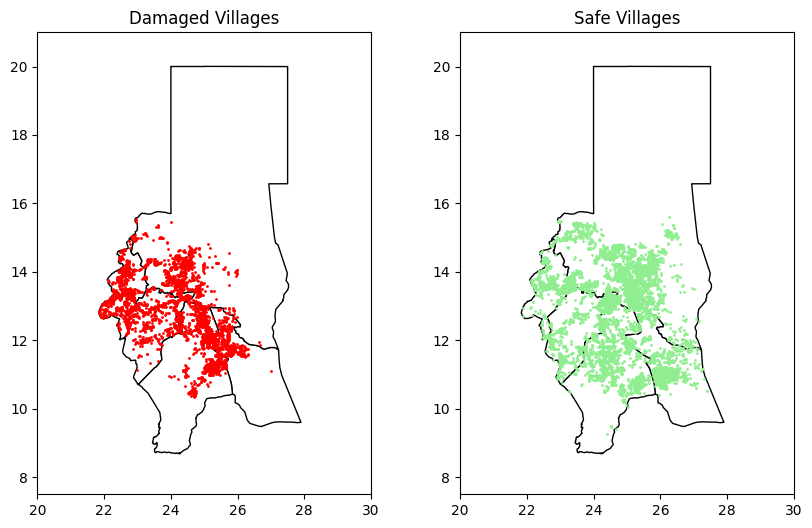

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_darfur(ax):
    darfur_regions = sudan_shp[sudan_shp["NAME_1"].str.contains("Darfur")]
    darfur_regions.plot(ax=ax, edgecolor='black', color="white")
    ax.set_xlim([20, 30])
    ax.set_ylim([7.5, 21])

## Plot comparison of damaged and un-damaged villages
# damaged villages
damaged_villages = village_damage[(village_damage["STATUS"] == "DESTROYED") | (village_damage["STATUS"] == "DAMAGED")]
# damaged_villages.plot(ax=ax, color='red', markersize=1)
safe_villages = village_damage[village_damage["STATUS"] == "NO DAMAGE"]
# safe_villages.plot(ax=ax, color='lightgreen', markersize=1)
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

plot_darfur(axs[0])
damaged_villages.plot(ax=axs[0], color='red', markersize=1)
axs[0].set_title("Damaged Villages")

plot_darfur(axs[1])
safe_villages.plot(ax=axs[1], color='lightgreen', markersize=1)
axs[1].set_title("Safe Villages")

plt.show()

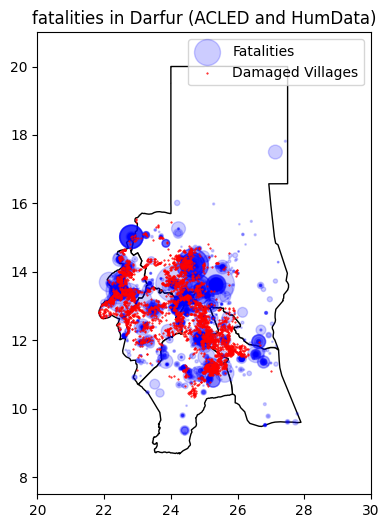

In [103]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_darfur(ax)

darfur_acled = pd.read_csv('../data/acled/darfur.csv')
darfur_acled['geometry'] = gpd.points_from_xy(darfur_acled["LONGITUDE"], darfur_acled["LATITUDE"])
darfur_acled = gpd.GeoDataFrame(darfur_acled, geometry='geometry')
darfur_acled.plot(ax=ax, color='blue', markersize=darfur_acled["FATALITIES"], alpha=0.2)
damaged_villages.plot(ax=ax, color='red', markersize=0.25)
# safe_villages.plot(ax=ax, color='lightgreen', markersize=0.25)

plt.legend(["Fatalities", "Damaged Villages"])
plt.title("fatalities in Darfur (ACLED and HumData)")
plt.show()

